一、导入模块

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.font_manager import FontProperties
# jupyter显示matplotlib生成的图片
%matplotlib inline
# 中文字体设置
font = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')

二、感知机模型

In [2]:
class Perceptron():
    """自定义感知机算法"""

    def __init__(self, learning_rate=0.01, num_iter=50, random_state=1):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.random_state = random_state

    def fit(self, X, y):
        """初始化并更新权重"""
        # 通过标准差为0.01的正态分布初始化权重
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        self.errors_ = []

        # 循环遍历更新权重直至算法收敛
        for _ in range(self.num_iter):
            errors = 0
            for x_i, target in zip(X, y):
                # 分类正确不更新，分类错误更新权重
                update = self.learning_rate * (target - self.predict(x_i))
                self.w_[1:] += update * x_i
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

        return self

    def predict_input(self, X):
        """计算预测值"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """得出sign(预测值)即分类结果"""
        return np.where(self.predict_input(X) >= 0.0, 1, -1)

三、获取数据

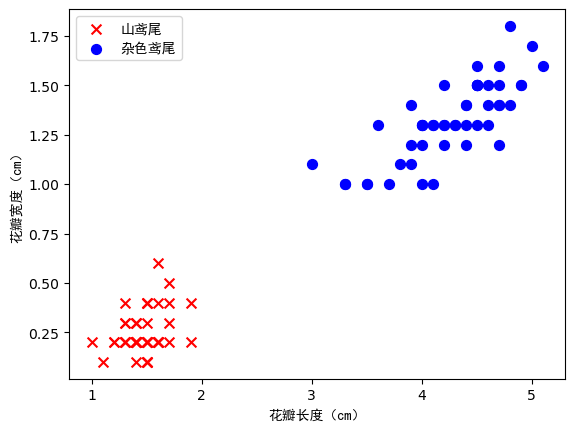

In [3]:
df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# 取出前100行的第五列即生成标记向量
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', 1, -1)

# 取出前100行的第一列和第三列的特征即生成特征向量
X = df.iloc[0:100, [2, 3]].values

plt.scatter(X[:50, 0], X[:50, 1], color='r', s=50, marker='x', label='山鸢尾')
plt.scatter(X[50:100, 0], X[50:100, 1], color='b', s=50, marker='o', label='杂色鸢尾')
plt.xlabel('花瓣长度（cm）', fontproperties=font)
plt.ylabel('花瓣宽度（cm）', fontproperties=font)
plt.legend(prop=font)
plt.show()

四、构造决策边界

In [4]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # 构造颜色映射关系
    marker_list = ['o', 'x', 's']
    color_list = ['r', 'b', 'g']
    cmap = ListedColormap(color_list[:len(np.unique(y))])

    # 构造网格采样点并使用算法训练阵列中每个元素
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # 第0列的范围
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # 第1列的范围
    t1 = np.linspace(x1_min, x1_max, 666)  # 横轴采样多少个点
    t2 = np.linspace(x2_min, x2_max, 666)  # 纵轴采样多少个点
#     t1 = np.arange(x1_min, x1_max, resolution)
#     t2 = np.arange(x2_min, x2_max, resolution)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
#     y_hat = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T) # 预测值
    y_hat = classifier.predict(np.stack((x1.flat, x2.flat), axis=1))  # 预测值
    y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同

    # 通过网格采样点画出等高线图
    plt.contourf(x1, x2, y_hat, alpha=0.2, cmap=cmap)
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())

    for ind, clas in enumerate(np.unique(y)):
        plt.scatter(X[y == clas, 0], X[y == clas, 1], alpha=0.8, s=50,
                    c=color_list[ind], marker=marker_list[ind], label=clas)

五、训练模型

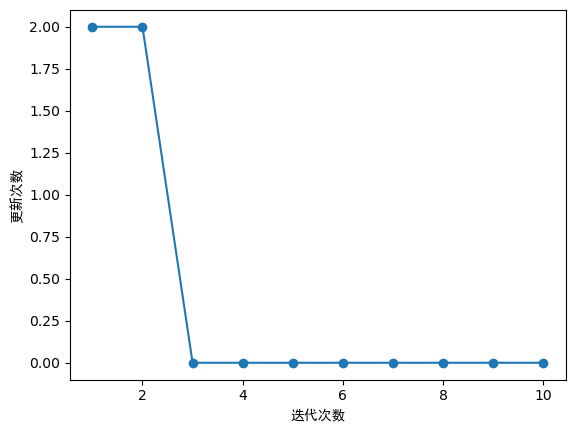

In [5]:
perceptron = Perceptron(learning_rate=0.1, num_iter=10)
perceptron.fit(X, y)
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.xlabel('迭代次数', fontproperties=font)
plt.ylabel('更新次数', fontproperties=font)
plt.show()

六、可视化

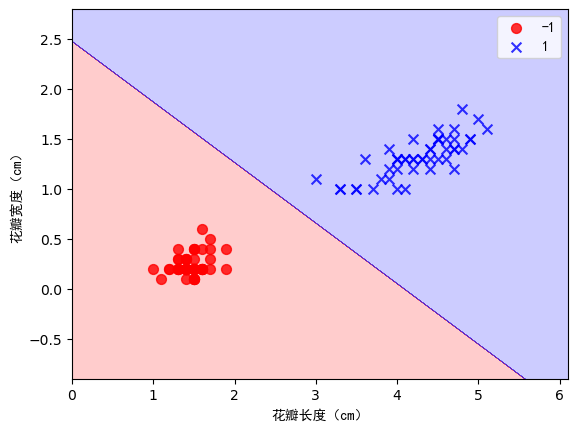

In [6]:
plot_decision_regions(X, y, classifier=perceptron)
plt.xlabel('花瓣长度（cm）', fontproperties=font)
plt.ylabel('花瓣宽度（cm）', fontproperties=font)
plt.legend(prop=font)
plt.show()